# Preprocessing

We will first take a look at our dataset, and see what kind of preprocessing is neccesary before we can train a model.

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
bibleTrain = pd.read_csv('../input/training_dataset.csv')
bibleTest = pd.read_csv('../input/test_dataset.csv')

In [7]:
bibleTrain.author.value_counts()

Marcus                5118
Philippus             2345
Ovionicus             1303
Blanquius             1017
Paithonius             643
Clarius                623
Ubuntius               539
FerrumEffractarius     429
Name: author, dtype: int64

In [8]:
display(bibleTrain.head())
display(bibleTest.head())
bibleTrain.isna().sum()

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus


,id,0,1,2,3,4,5,6,7,8,9
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303


id        0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
author    0
dtype: int64

In [9]:
bibleTrain.dtypes

id          int64
0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
author     object
dtype: object

In [10]:
bibleTrain.describe()

,id,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,6008.000000,0.019518,0.029916,-0.004594,-0.014289,0.004577,0.006347,0.030889,-0.000169,-0.009445,-0.020024
std,3469.153427,0.978726,3.654967,1.078240,0.988741,0.966598,1.112374,1.252435,1.005326,1.081102,0.984810
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090691,-5.486218,-6.719324
25%,3004.000000,-0.116585,-0.251983,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.545477,-0.372457,-0.525687
50%,6008.000000,0.056229,-0.047852,0.214288,0.080127,0.261718,-0.058835,0.220177,0.105386,0.064084,-0.041421
75%,9012.000000,0.216699,0.203385,0.345875,0.615571,0.261718,0.564038,0.446679,0.650007,0.500624,0.508679
max,12016.000000,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


Looking at the maximums for the different values, min-max scaling could help with some of the larger values and reducing distances.  
We also notice that most features do not have a normal distribution: the 75% quartile is very far from the maximum value. A linear model is unlikely to be very helpful because of this.

In [11]:
X = bibleTrain.columns[1:-1]
bibleTrain[X].head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088
1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374


In [12]:
# scaler = MinMaxScaler()
# transDataTrain = scaler.fit_transform(bibleTrain[X])
# bibleTrain[X] = transDataTrain

In [13]:
bibleTrain.describe() # Checking that we have correctly transformed the data

,id,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,6008.000000,0.019518,0.029916,-0.004594,-0.014289,0.004577,0.006347,0.030889,-0.000169,-0.009445,-0.020024
std,3469.153427,0.978726,3.654967,1.078240,0.988741,0.966598,1.112374,1.252435,1.005326,1.081102,0.984810
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090691,-5.486218,-6.719324
25%,3004.000000,-0.116585,-0.251983,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.545477,-0.372457,-0.525687
50%,6008.000000,0.056229,-0.047852,0.214288,0.080127,0.261718,-0.058835,0.220177,0.105386,0.064084,-0.041421
75%,9012.000000,0.216699,0.203385,0.345875,0.615571,0.261718,0.564038,0.446679,0.650007,0.500624,0.508679
max,12016.000000,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [14]:
# Repeating the process for the test dataset

# transDataTest = scaler.fit_transform(bibleTest[X])
# bibleTest[X] = transDataTest

In [15]:
bibleTest.describe()

,id,0,1,2,3,4,5,6,7,8,9
count,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000
mean,4005.500000,0.024191,-0.022906,-0.011156,-0.034853,0.015393,0.001217,0.036645,-0.013070,-0.009107,-0.017350
std,2313.009511,1.014693,0.801509,0.969183,0.990701,0.945473,0.982708,0.960981,0.991597,0.986599,0.975017
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-4.737863,-6.719324
25%,2002.750000,-0.116585,-0.259834,0.057807,-0.528002,0.172340,-0.598658,-0.006326,-0.553301,-0.372457,-0.508262
50%,4005.500000,0.056229,-0.055704,0.210732,0.057241,0.261718,-0.058835,0.220177,0.100794,0.064084,-0.035351
75%,6008.250000,0.216699,0.203385,0.345875,0.589977,0.261718,0.522513,0.446679,0.630869,0.469443,0.498757
max,8011.000000,11.819916,19.470188,7.419561,3.987152,1.066121,5.048721,8.902772,4.251197,3.244594,4.671232


Before we do any further preprocessing, we will train a model to establish a baseline prediction, and work from there

In [16]:
bibleTrain.to_csv('../cleanData/1-training-data.csv', index=False)
bibleTest.to_csv('../cleanData/1-test-data.csv', index=False)

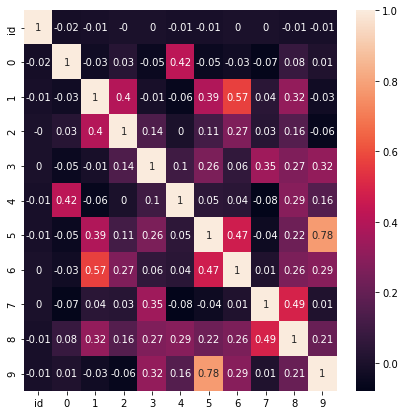

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(round(bibleTrain.corr(),2), annot=True)

In [18]:
bibleTrain.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'get_dummies'